Libraries

In [3]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

In [64]:
# Deep Learning Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# Data Preprocessing 

Reading the Dataset

In [4]:
dataset = pd.read_csv("/content/Credit_Card_Applications.csv")

Features and Target

In [5]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1))
x = scaler.fit_transform(x)

# SOM Training

Create the SOM Object

In [7]:
# x, y -> The dimension of the map
# input_len -> The input shape
# sigma -> The radius of each neighbors
# learning_rate -> How much the weights will be updated
# There is also decay_functions and random_seed 
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

Initialize the Weight

In [8]:
som.random_weights_init(x)

Train the SOM

In [9]:
# Only use the x, without the y because it is an unsupervised algorithm
som.train_random(data = x, num_iteration = 100)

# SOM Visualization

Fraud Detection

In [10]:
# We can identify frauds from the credits card by observing nodes that have highest MID
# Basically, MID (Mean Interneuron Distance) are distances between neurons
# If there are neurons with much more differences value with other neurons, then most likely it is a fraud
# In this visualization, high MID will be determined by the whiter the color of each neurons are

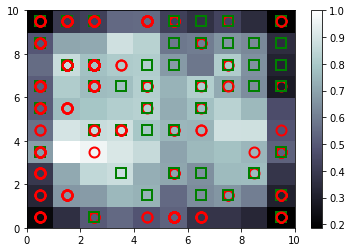

In [11]:
# Initialize the Window
bone()

# Putting the Neighboring Neurons
pcolor(som.distance_map().T)

# Adding Color Legends to the Chart
colorbar()

# Approval Markers
markers = ["o", "s"]
colors = ["r", "g"]

# Associate Data to Markers
# x, y in plot -> The position of the winning node

for idx, features in enumerate(x):
  w = som.winner(features)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[idx]],
       markeredgecolor = colors[y[idx]],
       markerfacecolor = "None",
       markersize = 10,
       markeredgewidth = 2,
       )

# Show the Graph
show()

# Specific Fraud Data

Get All Winning Nodes and Customers Mapping

In [24]:
mappings = som.win_map(x)

In [51]:
mappings[(2, 3)]

[array([1.71710134e-01, 0.00000000e+00, 2.50676692e-01, 4.91071429e-02,
        5.00000000e-01, 6.15384615e-01, 8.75000000e-01, 1.40350877e-03,
        0.00000000e+00, 1.00000000e+00, 4.47761194e-02, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 3.30000000e-04])]

In [52]:
mappings[(1, 7)]

[array([0.68839822, 1.        , 0.03639098, 0.00142857, 0.5       ,
        0.53846154, 0.375     , 0.00140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ]),
 array([0.57560395, 1.        , 0.2356391 , 0.04464286, 0.5       ,
        0.61538462, 0.375     , 0.06140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.1       , 0.        ]),
 array([7.46509216e-01, 1.00000000e+00, 3.42105263e-01, 1.51785714e-01,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 1.22807018e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 2.27000000e-01, 5.00000000e-04]),
 array([0.80564132, 1.        , 0.24180451, 0.125     , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.108     , 0.        ]),
 array([0.02282875, 1.        , 0.35834586, 0.        , 0.5       ,
        0.53846154, 0.375     , 0.      

Get Lists of Fraud Customers

In [48]:
# Dangerous hard-coded code for the mappings
frauds = np.concatenate((mappings[(2, 3)], mappings[(1, 7)]), axis = 0)

Inverse Scaling the Transformed Data

In [49]:
frauds = scaler.inverse_transform(frauds)

In [50]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5737627e+07, 1.0000000e+00, 1.6170000e+01, 4.0000000e-02,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5709459e+07, 1.0000000e+00, 2.9420000e+01, 1.2500000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 1.0000000e+00],
       [1.5752139e+07, 1.0000000e+00, 3.6500000e+01, 4.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 3.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

# Feature Extraction

Creating the Matrix

In [53]:
customers = dataset.iloc[:, 1:].values

Dependent Variable

In [59]:
is_fraud = np.zeros(len(dataset))

Replace the Dependent to Frauds Detected by SOM

In [60]:
for i in range(len(dataset)):
  if(dataset.iloc[i, 0] in frauds):
    is_fraud[i] = 1

In [61]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

# Training the ANN

Feature Scaling

In [65]:
# Ease calculations resources
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers = scaler.fit_transform(customers)

**Activation Function**

Either `Rectifier (Relu)` or `Sigmoid` is good because the target is in binary and both of the functions gave the results ranging between 0 and 1. The difference is Relu gives `just 0 or 1`, but Sigmoid gives value similar to the `probability` of the events (continuous value between 0 and 1)

Initializing Artificial Neural Networks

In [66]:
classifier = Sequential()

Adding Input Layer

In [67]:
classifier.add(Dense(units=2, activation='relu', kernel_initializer='uniform', input_dim = 15))

Output Layers

In [68]:
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

Compile the ANN

In [69]:
# Similar to applying gradiant descent to all the layers
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

Fit the ANN to the Training Set

In [70]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 970us/step - loss: 0.5913 - accuracy: 0.9574
Epoch 2/2
690/690 [==============================] - 1s 943us/step - loss: 0.2706 - accuracy: 0.9462


# Making Predictions

Predict the Probability of Frauds

In [72]:
# Predict the probability of frauds for each customers
pred = classifier.predict(customers)

Concatenate the Customer ID and Prediction Result

In [77]:
pred = np.concatenate((dataset.iloc[:, 0:1].values, pred), axis = 1)

Sort the Predicted Values

In [79]:
pred = pred[pred[:, 1].argsort()]

In [82]:
pred

array([[1.57238270e+07, 2.61968374e-03],
       [1.56548590e+07, 3.28487158e-03],
       [1.57250280e+07, 4.03901935e-03],
       ...,
       [1.57574340e+07, 3.27698827e-01],
       [1.56993400e+07, 3.27698827e-01],
       [1.56444000e+07, 3.27698827e-01]])